# The best rank $k$ approximation of a matrix.

The best rank-k approximation of a matrix is a matrix of rank k that is closest to the original matrix in terms of a specified matrix norm. This concept is closely related to the concept of matrix factorization and is commonly used in various numerical linear algebra and data analysis tasks, such as Principal Component Analysis (PCA).

###  A fact from linear algebra: 

Let $\vec{u}\in \mathbb{R^m}$ and $\vec{v} \in \mathbb{R^n}$. Show that $\ \vec{u}\ \vec{v}^T\ $ is an $mxn$ matrix of rank $1$.

Given a matrix $A$, how do you decompose it into the sum of some matrices of the same size but with lower rank?

__Example 1__ Write $A = \begin{bmatrix} 1 & 2\\ 3 & 4   \end{bmatrix}$ as the sum of matrices of rank $1$.



__Solution:__ $A = \begin{bmatrix} 1 & 0\\ 0 & 0   \end{bmatrix} + \begin{bmatrix} 0 & 2\\ 0 & 0   \end{bmatrix} + \begin{bmatrix} 0 & 0\\ 3 & 0   \end{bmatrix} + \begin{bmatrix} 0 & 0\\ 0 & 4   \end{bmatrix}$

As you can check, there are many ways to do so. Another popular way to so is using SVD. Recll that the SVD of an $mxn$ matrix A of rank r is given by:

$A = U\Sigma V^T$.

Where:
- $U = [ U_1\dots U_m]$  is an m × m orthogonal matrix.
- $\Sigma$ is an m × n _diagonal_like_  matrix with singular values $\sigma_1 \geq \sigma_2 \geq \dots \sigma_r \geq 0$ in decreasing order on the diagonal.
- $V = [V_1 \dots V_n]$ is an n × n orthogonal matrix.


Then we can write: 

$$
A = \sigma_1 U_1 V_1^T + \sigma_2 U_2 V_2^T + \dots + \sigma_r U_r V_r^T
$$

Each term in above sum is of rank one by (*)

The way the SVD decompose a matrix, is special. SVD provides a way to find the best approximation of the matrix $A$ with a matrix of a smaller rank. The choice of "best" depends on the specific matrix norm you're using. Recall that a norm is function that allows you to compare two objects. 

The Frobenius norm, denoted as $\|.\|_F$, is defined as the square root of the sum of the absolute squares of its elements. Formally, for an m x n matrix $A = [a_{ij}]$, the Frobenius norm is calculated as follows:

$$\|A\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2}$$

The Frobenius norm gives a way to quantify the _dissimilarity_ between any two matrices A and B:

$$\|A-B\|_F$$

Here's an example in Python and NumPy to calculate the Frobenius norm and dissimilarity between two matrices:

In [48]:
# needed libraries
import matplotlib.pyplot as plt
import numpy as np
import time

In [51]:
# Define two matrices A and B.
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[10, 11, 12], [13, 14, 15], [16, 17, 18]])

# Calculate the Frobenius norm
frobenius_norm_A = np.linalg.norm(A)
frobenius_norm_B = np.linalg.norm(B)
dissimilarity_AB = np.linalg.norm(A - B)

print("Frobenius norm of matrix A:", frobenius_norm_A)
print()
print("Frobenius norm of matrix B:", frobenius_norm_B)
print()
print("The dissimilarity between A and B:", dissimilarity_AB)

Frobenius norm of matrix A: 16.881943016134134

Frobenius norm of matrix B: 42.708313008125245

The dissimilarity between A and B: 27.0


To find the best rank-k approximation $A_k$, set all singular values beyond the k-th largest singular value to zero and then reconstruct $A$ as follows:

$$
A_k = \sigma_1 u_1 v_1^T + \sigma_2 u_2 V_2^T + \dots + \sigma_k u_k u_k^T \quad \text{where} \quad k \leq r \quad (**)
$$

We donote $(**)$ by $A_k$ and refer to it as _the best rank-k approximation of $A$_ due to the following theorem which states: the dissimilarity between $A$ and $A_k$ is less than the dissimilarity between $A$ and any other matrix of rank $k$. Recall that, dissimilarity is quantified using the Frobenius norm.

__Theorem (Eckart-Young-Mirsky)__

For any matrix $B$ of rank $k\ $ ($k \leq r$), we have:
$$
\sigma_k = \|A - A_k\|_F \leq \|A - B\|_F 
$$


This approximation proves valuable for tasks like dimensionality reduction, noise reduction, and various other applications in linear algebra, machine learning, and data analysis.


### Using SVD for Image Compression

__Steps__

1. Upload an image and preprocess it in Python
2. Converting the image into a matrix A
3. Find SVD of A
4. Construct the best rank-k matrix A_k
5. Find the value of k for which $A_k$ gives a good a rough image of the original image.

__Image Processing__
The standard imaging library in Python is `PIL` (Python Imaging Library). We use `Pillow`, a more up-to-date version and a fork of `PIL`. It supports a wide range of image file formats including: JPEG, PNG, BMP, GIF, TIFF, WebP, and more.

If you are using a local computer and not googole colab, you might need to install it first:

In [63]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


__Step 1: uploading an image:__

Here, for simplicity, I renamed my image to `S`. 

In [58]:
from PIL import Image
from google.colab import files

# Use files.upload() to upload a file
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [109]:
# lets open the uploaded image. My file is S.png. 
from PIL import Image
# if your image has a different format, use that format. Ex: S.pdf or S.JEPG
img = Image.open('S.png')
# let's print it:
img

FileNotFoundError: [Errno 2] No such file or directory: 'S.png'

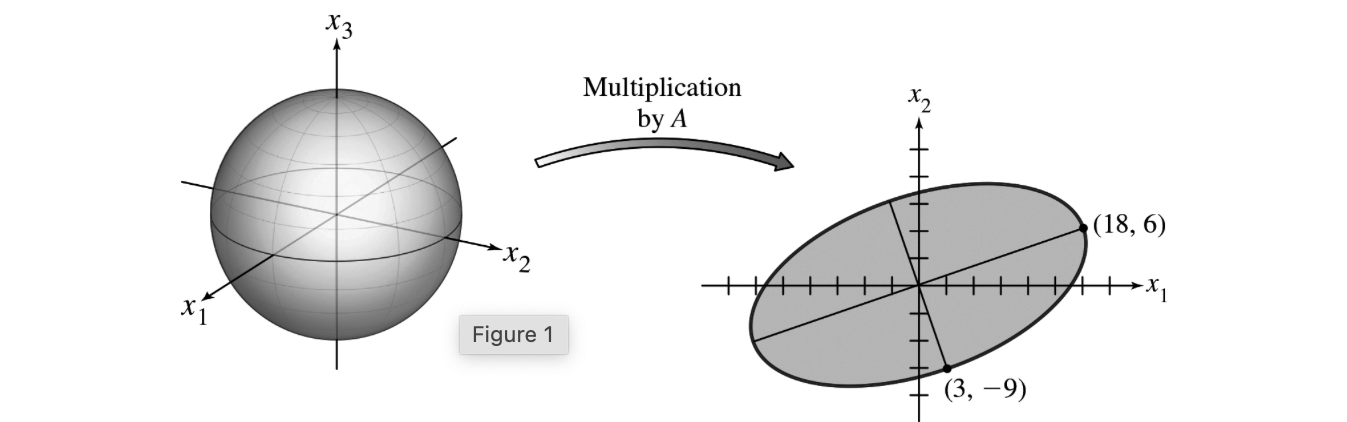

In [64]:
#Here we convert the picture to grayscales 

image_gray = img.convert('LA') ##'LA' stands for "Luminance-Alpha; 
                               ## use  ChatGPT to learn more about this
image_gray                        

__Step 2:__

The following cell converts the image into a matrix.

In [65]:
# This line extracts the pixel data from a grayscale image as a list

image_matrix = np.array(list(image_gray.getdata(band=0)), float)  #use ChatGPT to underestand this line better



# This line ensures that the shape of the array matches the image's dimensions. 

image_matrix.shape = (image_gray.size[1], image_gray.size[0])



# This line converts the image_matrix from a NumPy array to a NumPy matrix for processing.

image_matrix = np.matrix(image_matrix)

In [66]:
# here is the result:
image_matrix

matrix([[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]])

In [67]:
# This line checks the size of this matrix:

image_matrix.shape

(422, 1347)

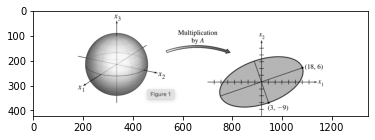

In [68]:
# Sanity check: let's see if this matrix really represents the original image:


plt.imshow(image_matrix, cmap='gray')  # 'cmap' specifies the colormap (grayscale)

__Step 3: SVD__

We use NumPy linear algebra library (`np.linalg`) to compute SVD: 

In [69]:
# computing SVD
U, sigma, V = np.linalg.svd(image_matrix)

In [74]:
# print U and its size
print('U = ', U)

print(20*'***')
print('The size of U = ', U.shape)

U =  [[-5.20830202e-02 -4.38728559e-02 -8.75083583e-03 ...  4.41860420e-03
  -8.00546615e-04 -1.59347965e-02]
 [-5.20830202e-02 -4.38728559e-02 -8.75083583e-03 ... -1.02458516e-03
   3.74191218e-02 -2.63486633e-02]
 [-5.20830202e-02 -4.38728559e-02 -8.75083583e-03 ... -2.19484444e-03
   8.75036723e-02  1.82421426e-01]
 ...
 [-5.20528877e-02 -4.04052972e-02 -9.08170678e-03 ... -6.56979750e-02
  -2.15715004e-02  1.43914677e-02]
 [-5.20528877e-02 -4.04052972e-02 -9.08170678e-03 ...  4.11694202e-02
  -3.37397081e-03 -1.63585466e-02]
 [-5.20551578e-02 -4.06167873e-02 -9.06862102e-03 ...  3.26561694e-15
  -3.46164070e-15 -1.10241677e-15]]
************************************************************
The size of U =  (422, 422)


In [79]:
# print V and its size


(422,)

In [75]:
# print sigma and its size

As you can see, `np.linalg.svd` only records the non-zero entries of sigma. So instead of a matrix, we have a list (a vector) of singular values. This alos allows us to find the rank of our matrix (image). Recall that the rank of a matrix is the number of its non-zero singular values.

In [80]:
# what is the rank of our image? 
sigma.shape

(422,)

In [81]:
# what is the maximum singular value?
max(sigma)

179172.23217782195

In [82]:
# what is the minimum singular value?
min(sigma)

1.7851371844407038e-11

__Step 4: constructing the best rank k matrix $A_k$.__

Recall that $A_k$ can be computed uning $(**)$ above


We can also write this as:

$$
A_k = U_k \Sigma_k V^T_k
$$

Where $U_k$ is an $m\times k$ matrix containing the first k columns of U, $\Sigma_k$ is an $k\times k$ diagonal matrix containing the first k singular values on its diagonal, and $V_k$ is an $n\times k$ matrix containing the first k columns of V. Let's write a Python function that computes $A_k$.

In [104]:
# this function computes and plot A_k

def A(k):
    U_k = U[:, :k]   #selects the first k columns of the matrix U.
    V_k = V[:k, :]   #selects the first k rows of the matrix V.
    sigma_k =  np.diag(sigma[:k]) #constructs a diagonal matrix using the first k singular values.
    A_k = np.matrix(U[:, :k]) @ np.diag(sigma[:k]) @ np.matrix(V[:k, :]) # computes A_k
    
    plt.imshow(A_k, cmap='gray');
    plt.title(f'Rank-{k} Approximation')
    plt.show()



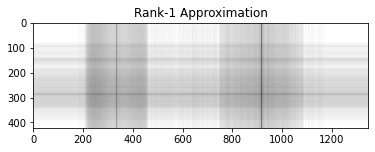

In [105]:
# A_1
A(1)

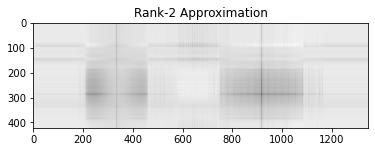

In [106]:
# A_2
A(2)

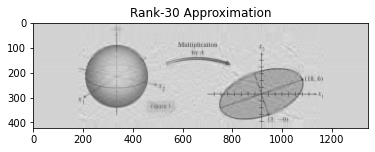

In [111]:
A(30)

Let's see what are we doing! When using Singular Value Decomposition (SVD) in Python, we often deal with three matrices $(U, \Sigma, V)$ that can take up a lot of memory. However, if you only need an approximate version of your data and not all the details, you can store fewer numbers. The number of numbers you need to store depends on the level of detail (rank "k") you want to preserve in the approximation. 

In [112]:
# find the minimum value of k for which A_k gives a rough image of the original image.
## recall that k < rank(A) = 422

